In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import chi2

# Remuestreo

In [10]:
sample = np.array([0.974,0.950,0.932,1.104,1.038,0.920,0.935,0.907,0.810,0.915])

In [22]:
media = np.mean(sample)
print(media)

0.9484999999999999


In [31]:
def Bootstrapping(sample):
    resample = np.random.choice( sample, size=len(sample), replace=True )
    return resample

In [35]:
N = 100000

ValoresMedios = np.zeros( N )

for i in tqdm(range(N)):
    resample = Bootstrapping(sample)
    ValoresMedios[i] = np.mean(resample)

100%|██████████| 100000/100000 [00:06<00:00, 14430.19it/s]


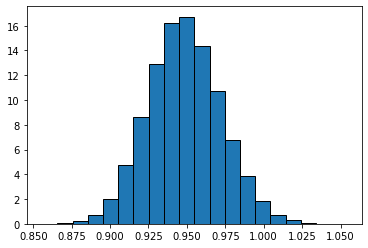

In [41]:
plt.hist(ValoresMedios, bins=20, density=True, ec='k');

In [43]:
mean = np.percentile(ValoresMedios,50)
print(mean)

0.9478000000000002


In [9]:
file = '../Data/Sesion6/MinimosCuadratico.txt'